# Simple DC-Motor Control - Workflow
 Instead of calling each function individually for the fmu export, simulation and data storage, a predefined workflow function can be used. Among other arguments, this function takes the path to a json file as an argument. All information for the simulation, the fmu export and the data storage are stored in this file.

In [1]:
import os 
import sys
sys.path.append(os.path.realpath('..//..')+ '/src')
from workflow import workflow
path_to_json = os.path.join(os.path.realpath("."), "workflow.json")

Example json file:
```json
{
    "project directory": "C:\\Users\\Daniele\\Desktop\\Motor_Control1",
    "dymola path": "C:\\Program Files\\Dymola 2018 FD01\\bin64",
    "fmu export": [
        {
            "model name": "DC_Motor",
            "modeling environment": "d",
            "model directory": "C:\\Users\\Daniele\\Documents\\GitLab\\fair_sim_release\\fair_sim_release\\examples\\motor_control",
            "packages": [],
            "datasheet directory": "C:\\Users\\Daniele\\Documents\\GitLab\\fair_sim_release\\fair_sim_release\\examples\\motor_control",
            "datasheets": {
                "damper": "damper_datasheet"
            },
            "additional_parameters": {
                "inertia.J": 0.5
            },
            "model_modifiers": null,
            "store copy": "C:\\Users\\Daniele\\Documents\\GitLab\\fair_sim_release\\fair_sim_release\\examples\\motor_control" // optional. If specified a copy of the fmu is stored in this directory.
        }
    ],
    "fmus": [
        {
            "model name": "DC_Motor",
            "path": "C:\\Users\\Daniele\\Documents\\GitLab\\fair_sim_release\\fair_sim_release\\examples\\motor_control\\DC_0Motor.fmu", // if fmu needs to be exported first, set path to null. If the key "store copy" is specified, the path is automatically updated.
            "connections": [
                {
                    "input name": "u",
                    "connect to system": "pid",
                    "connect to variable": "u"
                }
            ]
        }
    ],
    "controls": [
        {
            "control name": "pid",
            "connections": [
                {
                    "input name": "speed",
                    "connect to system": "DC_Motor",
                    "connect to variable": "y"
                }
            ]
        }
    ],
    "record": {
        "DC_Motor": [
            "y",
            "MotorTorque.tau"
        ],
        "pid": [
            "u"
        ]
    },
    "plots": [ //variables that need to be plotted need to be listed in the key record. 
        {
            "x": "time",
            "y": [
                "DC_Motor.y" // "System_name.variable_name"
            ],
            "title": "Speed over time",
            "y_label": "SPEED",
            "x_label": "TIME"
        },
        {
            "x": "time",
            "y": "pid.u",
            "title": "Voltage over time",
            "y_label": "VOLTAGE",
            "x_label": "TIME"
        }
    ],
    "style_sheet_path": "C:\\Users\\Daniele\\Documents\\GitLab\\fair_sim_release\\fair_sim_release\\examples\\FST.mplstyle"
}
```

Create an instance of the control class and store it in a dictionary.

In [2]:
from discrete_pid import PID
pid = PID(0.0001, 3,20, 0.1, set_point = 100, u_max= 100, u_min= 0)
control_classes = {"pid": pid} #{control class name as specified in the json file: instance of the class}

Define stop time, start time and execute the function. 

Using existing hdf5 'hdf5_210904_160136.hdf5'
Run_9 created
FMU DC_0Motor.fmu initialized.
The class 'PID' contains all the necessary methods.
Starting Simulation...


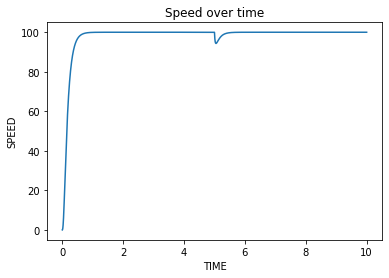

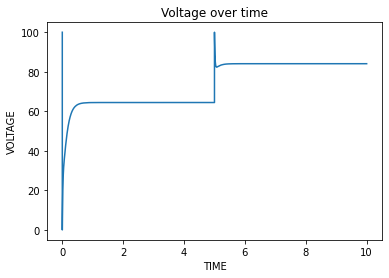

In [3]:
stop_time = 10
step_size = 1e-4
workflow(path_to_json, stop_time, step_size, control_classes)